# The Modelling Process
In this notebook, we reproduce modeling iterations on the data from our previous workshop session, following software engineering best practices. We'll also leverage our under-development library to automate repetitive tasks, ensuring a more efficient and organized workflow.

In [2]:
%load_ext autoreload
%autoreload 2
import os
import joblib
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.metrics import RocCurveDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, MiniBatchKMeans
from bank_marketing.data.make_datasets import make_bank_marketing_dataframe
from bank_marketing.data.prep_datasets import prepare_binary_classfication_tabular_data
from bank_marketing.features.skl_build_features import make_data_transformer, FeatureNames
from bank_marketing.models.skl_train_models import train_and_evaluate
from bank_marketing.models.skl_train_models import accuracy_evaluation, print_accuracy_results


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### Load the raw data saved in the EDA notebook

In [3]:
df = make_bank_marketing_dataframe("../data/bank_marketing.db", 
                                   "../data/external/socio_economic_indices_data.csv")

In [4]:
columns = ['age', 'job', 'marital', 'education', 'comm_month',
       'comm_day', 'comm_type', 'comm_duration', 'curr_n_contact', 'days_since_last_campaign', 'last_n_contact',
       'last_outcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'housing', 'loan',
       'default', 'curr_outcome']

In [5]:
df = df[columns]

## Iteration 1
In this initial iteration, we prepare the dataset for binary classification modeling and proceed to test our first baseline model, the Decision Tree, using our library.

To do that, you should implement first, `prepare_binary_classfication_tabular_data` in the module `bank_marketing.data.prep_datasets`. 

Then, you should complete the unit tests of this function in `tests/test_data/test_prep_datasets`. 

Afterward, you should implement `make_data_transformer` from the module `bank_marketing.features.skl_build_features ` and `accuracy_evaluation` from the module `bank_marketing.models.skl_train_models` based on the input scaler pipeline developed in the workshop.

In [6]:
predictors = list(df.columns)
predictors.remove('curr_outcome')
predictors.remove('comm_duration')
predicted = 'curr_outcome'

In [18]:
dataset = prepare_binary_classfication_tabular_data(df, predictors, predicted, pos_neg_pair=('yes', 'no'))

In [19]:
numerical_cols = dataset.train_x.select_dtypes(exclude='object').columns.values.tolist()
categorical_cols = dataset.train_x.select_dtypes('object').columns.values.tolist()
feature_names = FeatureNames(numerical_cols, categorical_cols)
input_transformer = make_data_transformer(feature_names)
classifier = DecisionTreeClassifier()

In [34]:
input_transformer.fit(dataset.train_x)
classifier.fit(input_transformer.transform(dataset.train_x), dataset.train_y)
results = accuracy_evaluation(input_transformer, classifier, dataset)
print_accuracy_results(results)

+-------+-------+-------+
| train |  val  |  test |
+-------+-------+-------+
| 0.994 | 0.844 | 0.846 |
+-------+-------+-------+


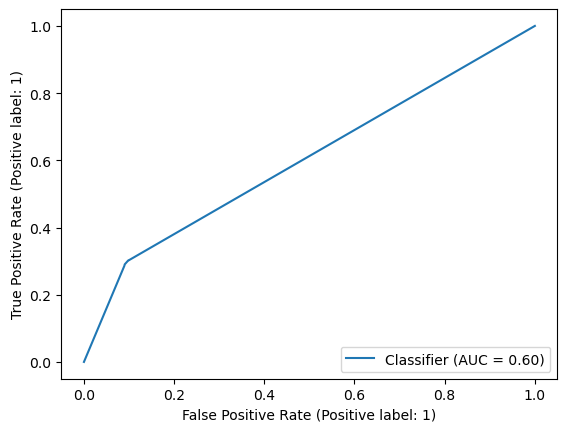

In [35]:
RocCurveDisplay.from_predictions(dataset.test_y.values,
                                 classifier.predict_proba(input_transformer.transform(dataset.test_x))[:,1])

## Iteration 2:
As we did in the workshop, the second iteration is about testing multiple models and compare their performance. To do that, you should develop the function `train_and_evaluate` in the module `bank_marketing.models.skl_train_models` to automate such experimentation.

In [36]:
classifiers_list = [DecisionTreeClassifier, MLPClassifier, RandomForestClassifier]
results = train_and_evaluate(dataset, input_transformer,  classifiers_list)
print_accuracy_results(results)

c:\Users\HoussemBenBraiek\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


+------------------------+-------+-------+-------+
|         model          | train |  val  |  test |
+------------------------+-------+-------+-------+
| DecisionTreeClassifier | 0.994 | 0.844 | 0.847 |
|     MLPClassifier      | 0.932 | 0.891 | 0.897 |
| RandomForestClassifier | 0.993 | 0.896 | 0.893 |
+------------------------+-------+-------+-------+


## Iteration 3
Following the same journey of the workshop, the third iteration is about testing advanced feature engineering with multiple models and comparing their performance. To do that, you should develop the appropriate classes and functions in both of the modeules: `bank_marketing.features.skl_build_features` and `bank_marketing.models.skl_train_models`. Then, you should use them here to automate the experimentation for a selection of clustering alogrithms and classifiers.

In [42]:
from bank_marketing.features.skl_build_features import make_advanced_data_transformer, AdvFeatureNames
from bank_marketing.models.skl_train_models import advanced_train_and_evaluate

In [39]:
person_info_cols_cat = ['job', 'marital','education','default', 'housing', 'loan', 'comm_type']
person_info_cols_num = ['age']
num_cols_wo_customer = ['curr_n_contact','days_since_last_campaign','last_n_contact','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
cat_cols_wo_customer = ['comm_month','comm_day', 'last_outcome']

In [40]:
adv_feature_names = AdvFeatureNames(person_info_cols_num, person_info_cols_cat, num_cols_wo_customer, cat_cols_wo_customer) 

In [41]:
classifiers_list = [DecisionTreeClassifier, RandomForestClassifier]
clustering_algos_list = [KMeans, MiniBatchKMeans]
results = advanced_train_and_evaluate(dataset, adv_feature_names, clustering_algos_list, classifiers_list)
print_accuracy_results(results)

Running the pair of KMeans and DecisionTreeClassifier


c:\Users\HoussemBenBraiek\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HoussemBenBraiek\anaconda3\Lib\site-packages\daal4py\sklearn\cluster\_k_means_0_23.py:184: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running the pair of KMeans and RandomForestClassifier


c:\Users\HoussemBenBraiek\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HoussemBenBraiek\anaconda3\Lib\site-packages\daal4py\sklearn\cluster\_k_means_0_23.py:184: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running the pair of MiniBatchKMeans and DecisionTreeClassifier


c:\Users\HoussemBenBraiek\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running the pair of MiniBatchKMeans and RandomForestClassifier


c:\Users\HoussemBenBraiek\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


+-----------------+------------------------+-------+-------+-------+
| clustering_algo |       classifier       | train |  val  |  test |
+-----------------+------------------------+-------+-------+-------+
|      KMeans     | DecisionTreeClassifier | 0.994 | 0.849 |  0.85 |
|      KMeans     | RandomForestClassifier | 0.993 | 0.893 | 0.893 |
| MiniBatchKMeans | DecisionTreeClassifier | 0.994 |  0.85 | 0.847 |
| MiniBatchKMeans | RandomForestClassifier | 0.993 | 0.896 | 0.895 |
+-----------------+------------------------+-------+-------+-------+


In [43]:
data_transformer = make_advanced_data_transformer(adv_feature_names, MiniBatchKMeans)
data_transformer.fit(dataset.train_x)
classifier = RandomForestClassifier()
classifier.fit(data_transformer.transform(dataset.train_x), dataset.train_y)
results = accuracy_evaluation(data_transformer, classifier, dataset)
print_accuracy_results(results)

c:\Users\HoussemBenBraiek\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


+-------+-------+-------+
| train |  val  |  test |
+-------+-------+-------+
| 0.993 | 0.893 | 0.892 |
+-------+-------+-------+


## Final Step
It is important now to save both of our feature engineering pipeline and trained model as two separate binary files for serving. The code is provided in the next cell. You should just update the paths. However, we ask you to load them from the binaries and compare the obtained predictions/performance with the ones in memory to make sure the persistance is correctly made.

In [44]:
os.makedirs('../models/rf_with_minibatch_kmeans')
joblib.dump(data_transformer, '../models/rf_with_minibatch_kmeans/feature_eng_pipeline.joblib')
joblib.dump(classifier, '../models/rf_with_minibatch_kmeans/model.joblib') 

['../models/rf_with_minibatch_kmeans/model.joblib']

In [45]:
# Let's load and test our model
loaded_data_transformer = joblib.load('../models/rf_with_minibatch_kmeans/feature_eng_pipeline.joblib')
loaded_classifier = joblib.load('../models/rf_with_minibatch_kmeans/model.joblib') 
results = accuracy_evaluation(loaded_data_transformer, loaded_classifier, dataset)
print_accuracy_results(results)

+-------+-------+-------+
| train |  val  |  test |
+-------+-------+-------+
| 0.993 | 0.893 | 0.892 |
+-------+-------+-------+
